In [1]:
from scipy.signal import chirp, spectrogram
import numpy as np
import matplotlib.pyplot as plt
import wavio

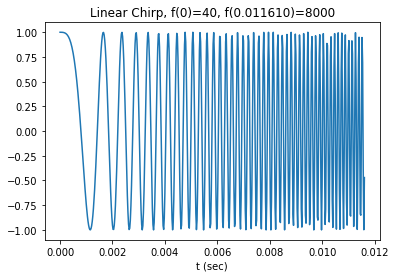

In [2]:
sampleRate = 44100
sample = 512
time = sample/sampleRate
f0 = 40
f1 = 8000 
t = np.linspace(0, time, sample)
w = chirp(t=t, f0=f0, f1=f1, t1=time, method='linear')

plt.plot(t, w)
plt.title("Linear Chirp, f(0)=%d, f(%f)=%d" %(f0, time, f1))
plt.xlabel('t (sec)')
plt.show()

In [3]:
def saveAsDat(fname, data):
    buffer = np.zeros(len(data)*2)
    for i, element in enumerate(data):
        buffer[i*2] = element
        buffer[i*2+1] = 0
    np.savetxt(fname, [buffer], delimiter=',\n', fmt='%1.19f')

def saveAsWav(fname, data, sampleRate):
    output = np.zeros((len(data), 2))
    output[:, 0] = data
    output[:, 1] = data
    wavio.write(fname, output, sampleRate, sampwidth=3)  

In [4]:
saveAsDat("chirp.dat", w)
saveAsWav("chirp.wav", w, sampleRate)